#Line Source in Infinite Medium

Consider a linear isotropic point source emitting $S_0$ $[\frac{neutrons}{cm^{2} sec}]$. The Source is also in this case considered isotropic such that the Neutron Flux does not depend on the angle. The Laplacian $\nabla^{2}$ becomes:

\begin{equation}
  \nabla^{2} = \frac{1}{r}\frac{d}{dr}(r\frac{d}{dr})
             = \frac{d^{2}}{d^{2}r} + \frac{1}{r}\frac{d}{dr}
\end{equation}

The Source is normalized with a factor $2 \pi r$:

\begin{equation}
  S(r) = \frac{S_0}{2 \pi r} \delta(r)
\end{equation}

We can write the *COMPLETE EQUATION* like reported below:

\begin{equation}
  [\frac{d^{2}}{d^{2}r} + \frac{1}{r}\frac{d}{dr}] \; \phi(r) 
  - \frac{1}{L^{2}}\phi(r) = -\frac{S(r)}{D} = - \frac{S_0}{2 \pi r D} \delta(r)
\end{equation}

*HOMOGENEOUS EQUATION:*

\begin{equation}
  [\frac{d^{2}}{d^{2}r} + \frac{1}{r}\frac{d}{dr}] \; \phi(r) 
  - \frac{1}{L^{2}}\phi(r) = 0
\end{equation}

*BOUNDARY CONDITIONS*

\begin{aligned}
  &(a)\;\;\; \lim_{r \rightarrow \infty} \phi(r) < \infty \\
  &(b)\;\;\; \lim_{r \rightarrow 0} 2 \pi r \; J(r) 
                = \lim_{r \rightarrow 0} -2 \pi r D \;\frac{d\phi(r)}{dr} = S_0
\end{aligned}

Applying a variable change in the above equation:

\begin{aligned}
  &\ u = \frac{r}{L}  \;\;\;\;\;\;\;\;\;\; ;
  &\ dr = L\; du 
\end{aligned}

The *NEW HOMOGENEOUS EQUATION* becomes:

\begin{equation}
  \frac{d^{2}\phi(u)}{d^{2}u} + \frac{1}{u}\frac{d}{du} \; \phi(u) - \phi(r) = 0
\end{equation}

We can easily recognize a special shape in this equation, a particular differential equation known as **Modified Bessel Equation of order n** (in our case *n=0*):

\begin{equation}
  \frac{d^{2}\phi(x)}{d^{2}x} + \frac{1}{x}\frac{d}{dx} \; \phi(x)
   - (1 + \frac{n^{2}}{x^{2}}) \; \phi(x) = 0
\end{equation}

where *n* is an integer value that denotes the order of the Bessel function. The solution to this equation can be written as a summation of linearly dependent Bessel Functions as follow:

\begin{equation}
  \phi(u) = C_1\;K_n(u) + C_2\;I_n(u)
\end{equation}

In the case of *n=0*:

\begin{equation}
  \phi(u) = C_1\;K_0(u) + C_2\;I_0(u) \\
  \\
  K_0 = Modified\;Bessel\;Function\;of\;Second\;Kind \\
  I_0 = Modified\;Bessel\;Function\;of\;First\;Kind \\
\end{equation}

#Bessel Functions

**Bessel Functions:**

\begin{equation}
  J_n = Bessel\;Function\;of\;First\;Kind \\
  Y_n = Bessel\;Function\;of\;Second\;Kind \\
\end{equation}

\begin{aligned}
  &\\
  &\\
  &\; J_n(x) = \sum_{K=0}^{\infty} \frac{(-1)^{k}}{\Gamma(k+1)\Gamma(k+n+1)}
         (\frac{x}{2})^{n+2k} \\
  &\\       
  &\; Y_n(x) = \frac{J_n(x) cos(n\pi) - J_-n(x)}{sin(n\pi)}
  &\\
  &\\
\end{aligned}


**Modified Bessel Functions:**

\begin{equation}
  I_n = Modified\;Bessel\;Function\;of\;First\;Kind \\
  K_n = Modified\;Bessel\;Function\;of\;Second\;Kind \\
  H_n = Hankel\;Functions
\end{equation}

\begin{aligned}
  &\\
  &\\
  &\; I_n(x) = i^{-n}\;J_n(ix) = i^{n}\;J_n(-ix) \\
  &\\       
  &\; K_n(x) = \frac{\pi}{2}\; i^{n+1}\; H_n^{(1)}(ix)
             = \frac{\pi}{2}\; i^{-n-1}\; H_n^{(2)}(-ix) \\
  &\\
  &\; H_n^{(1)}(x) = J_n(x) + i\;Y_n(x) \\
  &\\
  &\; H_n^{(2)}(x) = J_n(x) - i\;Y_n(x)\\
\end{aligned}

In [13]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

#variables and functions

r, u = sp.symbols("r, u")

C1, C2 = sp.symbols("C1, C2")

D, L, Sigma_a, So = sp.symbols("D, L, Sigma_a, S_0")

Phi, S = sp.symbols("Phi, S", cls=sp.Function)

In [14]:
#Source in Cylindrical coordinates
Source = sp.Eq(S(r), (So/(2*sp.pi*r))*sp.DiracDelta(r))
print("Source in Cylindrical Coordinates:\n")
Source

Source in Cylindrical Coordinates:



Eq(S(r), S_0*DiracDelta(r)/(2*pi*r))

In [15]:
#Complete starting Equation
Equation_r = sp.Eq(Phi(r).diff(r,2) + (1/r)*Phi(r).diff(r) - (1/(L**2))*Phi(r) , -Source.rhs/D)
print("Complete starting Equation:\n")
Equation_r

Complete starting Equation:



Eq(Derivative(Phi(r), (r, 2)) + Derivative(Phi(r), r)/r - Phi(r)/L**2, -S_0*DiracDelta(r)/(2*pi*D*r))

In [16]:
#Equation in u variable
Equation_u = sp.Eq(Phi(u).diff(u,2) + (1/u)*Phi(u).diff(u) - Phi(u) , -Source.rhs.subs({r:L*u})/D)
print("Complete starting Equation in u:\n")
Equation_u

Complete starting Equation in u:



Eq(-Phi(u) + Derivative(Phi(u), (u, 2)) + Derivative(Phi(u), u)/u, -S_0*DiracDelta(L*u)/(2*pi*D*L*u))

In [17]:
#Homogeneous in u variable
Equation_u_Homo = sp.Eq(Phi(u).diff(u,2) + (1/u)*Phi(u).diff(u) - Phi(u) , 0)
print("Homogeneous Equation in u:\n")
Equation_u_Homo

Homogeneous Equation in u:



Eq(-Phi(u) + Derivative(Phi(u), (u, 2)) + Derivative(Phi(u), u)/u, 0)

In [18]:
#Solution of the Homogeneous Equation in u                                      #So SymPy is able to recognize the modified Bessel function and to give the solution in terms of combination of
Solution_Equation_Homo_u = sp.dsolve(Equation_u_Homo,Phi(u))                    #modified Bessel functions of first order (I) and standard Bessel function of second (Y) order.
print("Homogeneous Equation Solution:\n")
Solution_Equation_Homo_u


Homogeneous Equation Solution:



Eq(Phi(u), C1*besseli(0, u) + C2*bessely(0, I*u))

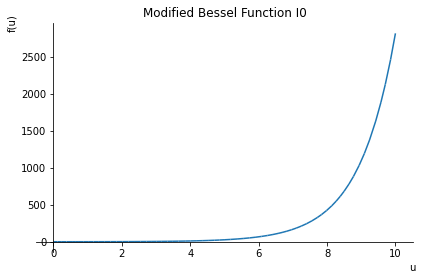

/usr/local/lib/python3.7/dist-packages/sympy/plotting/plot.py:1486: RuntimeWarning: invalid value encountered in double_scalars
  cos_theta = dot_product / (vector_a_norm * vector_b_norm)


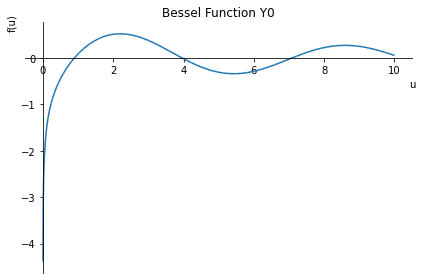

In [33]:
#Plotting Bessel Functions
from sympy.plotting import plot

I0 = plot(sp.besseli(0,u),(u,0,10),label="I0",title="Modified Bessel Function I0")
Y0 = plot(sp.bessely(0,u),(u,0,10),label="Y0",title="Bessel Function Y0")


In [20]:
#Imposing BC1/ the flux is bounded
Solution_u_BC1 = Solution_Equation_Homo_u.subs({C1:0})
print("Solution after imposing BC1:\n")
Solution_u_BC1

Solution after imposing BC1:



Eq(Phi(u), C2*bessely(0, I*u))

In [31]:
#Imposing BC2/ the limit of the current

Current = Solution_u_BC1.rhs.subs(sp.bessely(0,sp.S.ImaginaryUnit*u),sp.besselk(0,u))       

argument = -D * 2 * sp.pi * L * u * Current.diff(u)

Limit_Equation = sp.Eq(sp.limit(argument,u,0),So)

print("Limit Equation:\n")
Limit_Equation

Limit Equation:



Eq(Limit(2*pi*C2*D*L*u*besselk(1, u), u, 0), S_0)

In [32]:
#Manual limit
Limit_Equation_small_u = Limit_Equation.subs({sp.besselk(1,u):1/u})             

Limit_Equation_small_u_Solution = sp.solve(Limit_Equation_small_u.doit(), C2)[0]

print("Solution for C2:\n")
sp.Eq(C2, Limit_Equation_small_u_Solution)

Solution for C2:



Eq(C2, S_0/(2*pi*D*L))

In [23]:
#Substitution in the Equation
Solution_Final = Solution_u_BC1.subs(C2,Limit_Equation_small_u_Solution)
Solution_Final = Solution_Final.subs(sp.bessely(0,sp.S.ImaginaryUnit*u),sp.besselk(0,u))

print("Complete Solution:\n")
Solution_Final                                                                  #Why we perform this change with Bessel Functions?????????????????

Complete Solution:



Eq(Phi(u), S_0*besselk(0, u)/(2*pi*D*L))

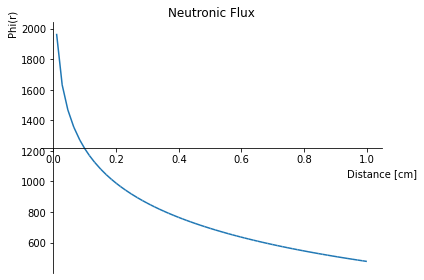

In [24]:
#Plotting
Sigma_t = 0.25
Sigma_s = 0.15

Sigma_a_val = Sigma_t - Sigma_s
So_val = 10**4
D_val = 1/(3*Sigma_t)
L_val = sp.sqrt(D_val/Sigma_a_val).evalf()

Solution_Final = Solution_Final.subs({u:r/L})
Solution_Final_evaluated = Solution_Final.subs({Sigma_a:Sigma_a_val, So:So_val, D:D_val, L:L_val}).evalf()

tendency = plot(Solution_Final_evaluated.rhs,(r,0.01,1),title="Neutronic Flux",ylabel="Phi(r)",xlabel="Distance [cm]")